In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('spotify_final.csv')
data.head()

,Unnamed: 0,song,artist,uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Like a Rolling Stone,Bob Dylan,spotify:track:3AhXZa8sUQht0UEdBJgpGc,0.482,0.721,-6.839,0.0321,0.731000,0.000000,0.1890,0.557,95.263
1,1,Smells Like Teen Spirit,Nirvana,spotify:track:3oTlkzk1OtrhH8wBAduVEi,0.485,0.863,-9.027,0.0495,0.000012,0.016200,0.1380,0.767,116.835
2,2,A Day In The Life - Remastered,The Beatles,spotify:track:3ZFBeIyP41HhnALjxWy1pR,0.364,0.457,-14.162,0.0675,0.290000,0.000106,0.9220,0.175,163.219
3,3,Good Vibrations (Mono),The Beach Boys,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,0.398,0.413,-10.934,0.0388,0.082200,0.000025,0.0891,0.331,133.574
4,4,Johnny B Goode,Chuck Berry,spotify:track:7MH2ZclofPlTrZOkPzZKhK,0.518,0.756,-10.851,0.0915,0.735000,0.000062,0.3170,0.968,166.429


In [3]:
data = data.drop("Unnamed: 0",axis=1)

In [4]:
data

,song,artist,uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Like a Rolling Stone,Bob Dylan,spotify:track:3AhXZa8sUQht0UEdBJgpGc,0.482,0.721,-6.839,0.0321,0.731000,0.000000,0.1890,0.557,95.263
1,Smells Like Teen Spirit,Nirvana,spotify:track:3oTlkzk1OtrhH8wBAduVEi,0.485,0.863,-9.027,0.0495,0.000012,0.016200,0.1380,0.767,116.835
2,A Day In The Life - Remastered,The Beatles,spotify:track:3ZFBeIyP41HhnALjxWy1pR,0.364,0.457,-14.162,0.0675,0.290000,0.000106,0.9220,0.175,163.219
3,Good Vibrations (Mono),The Beach Boys,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,0.398,0.413,-10.934,0.0388,0.082200,0.000025,0.0891,0.331,133.574
4,Johnny B Goode,Chuck Berry,spotify:track:7MH2ZclofPlTrZOkPzZKhK,0.518,0.756,-10.851,0.0915,0.735000,0.000062,0.3170,0.968,166.429
...,...,...,...,...,...,...,...,...,...,...,...,...
9942,Into The Valley,Skids,spotify:track:2QSD3K3b3BJ8DPhGhQfDPW,0.332,0.707,-12.698,0.0361,0.000012,0.006120,0.1100,0.652,144.815
9943,Tonight's Da Night,Redman,spotify:track:49XnDVsYOHgV4gFZeCojKj,0.464,0.749,-8.564,0.4800,0.224000,0.000046,0.3510,0.879,181.121
9944,Figure 8,FKA twigs,spotify:track:5Y9IIH8Xmo1nuk0gfFjc4Q,0.694,0.710,-9.793,0.3400,0.527000,0.001350,0.0697,0.415,119.964
9945,Like An Angel,The Mighty Lemon Drops,spotify:track:0ya0JYEFoXNviB8RMeHDtW,0.332,0.800,-9.746,0.0326,0.000368,0.001600,0.0850,0.832,149.240


In [5]:
#Make a dataframe with just audio features

In [6]:
audio_features = data[['danceability', 'energy', 'loudness', 'speechiness',
                      'acousticness', 'instrumentalness', 'liveness', 
                      'valence', 'tempo']]

In [7]:
audio_features

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.482,0.721,-6.839,0.0321,0.731000,0.000000,0.1890,0.557,95.263
1,0.485,0.863,-9.027,0.0495,0.000012,0.016200,0.1380,0.767,116.835
2,0.364,0.457,-14.162,0.0675,0.290000,0.000106,0.9220,0.175,163.219
3,0.398,0.413,-10.934,0.0388,0.082200,0.000025,0.0891,0.331,133.574
4,0.518,0.756,-10.851,0.0915,0.735000,0.000062,0.3170,0.968,166.429
...,...,...,...,...,...,...,...,...,...
9942,0.332,0.707,-12.698,0.0361,0.000012,0.006120,0.1100,0.652,144.815
9943,0.464,0.749,-8.564,0.4800,0.224000,0.000046,0.3510,0.879,181.121
9944,0.694,0.710,-9.793,0.3400,0.527000,0.001350,0.0697,0.415,119.964
9945,0.332,0.800,-9.746,0.0326,0.000368,0.001600,0.0850,0.832,149.240


In [8]:
#Fit - Need to save this in pickle
scaler = StandardScaler().fit(audio_features)

#Transform
X_prep = scaler.transform(audio_features)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=audio_features.columns).head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.500877,0.446024,0.611879,-0.520037,1.305379,-0.442774,-0.003658,-0.080983,-0.932486
1,-0.482882,1.053625,0.045128,-0.287486,-0.945408,-0.375215,-0.335144,0.772129,-0.160906
2,-1.208686,-0.683601,-1.284975,-0.046916,-0.052505,-0.442332,4.760650,-1.632833,1.498140
3,-1.004741,-0.871872,-0.448836,-0.430491,-0.692343,-0.442668,-0.652981,-0.999093,0.437808
4,-0.284935,0.595785,-0.427337,0.273845,1.317696,-0.442516,0.828309,1.588678,1.612955


In [9]:
import pickle

#saving the scaler for song reccomender
pickle.dump(scaler, open('scaler.pkl', 'wb'))

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

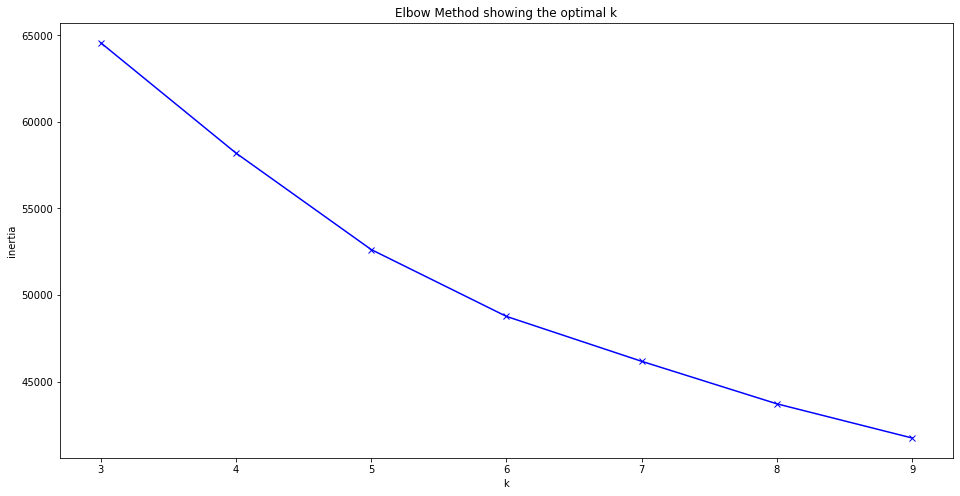

In [10]:
#First I tried the range 2-20 but couldn't see elbow so I narrowed the range to 3-10. And the elbow is at 6. 

K = range(3, 10)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

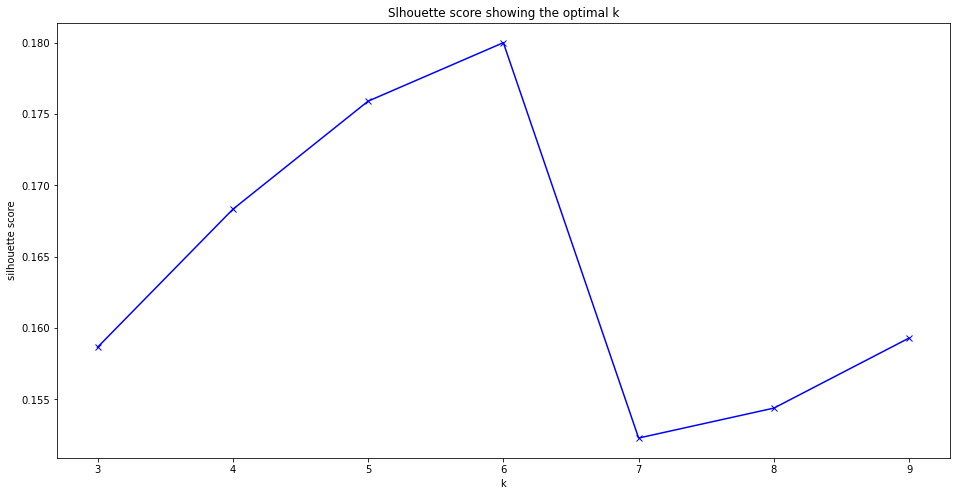

In [11]:
#First I tried the range 2-20, but then I narrowed the range to 3-10 to match above. And the highest point is at 6. 

K = range(3, 10)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [12]:
#Choosing 6 clusters

kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(X_prep)

clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     695
1    2308
2     956
3    3196
4    2146
5     646
dtype: int64

In [13]:
import pickle

#Saving the model
pickle.dump(kmeans, open('model.pkl', 'wb'))

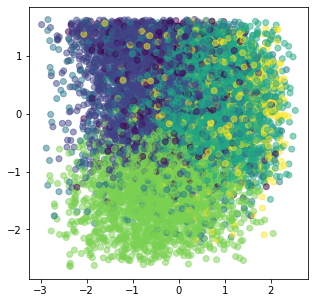

In [14]:
#Plotting just first(0) and second column(1) to visualize
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=clusters,alpha=0.5)
plt.show()

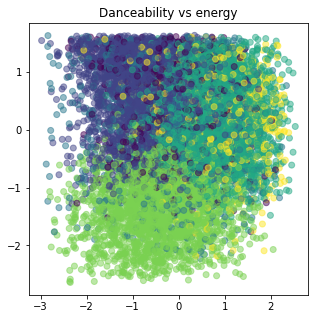

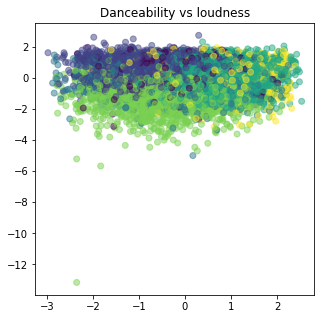

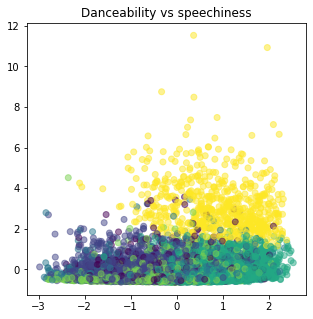

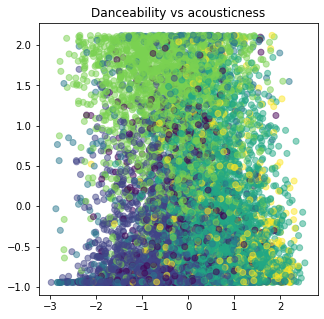

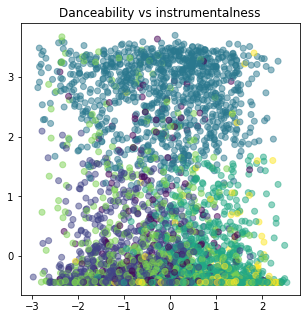

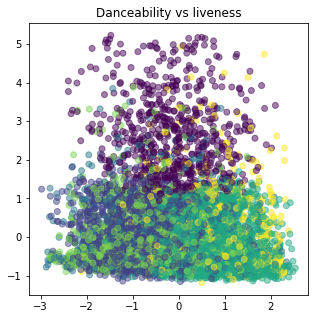

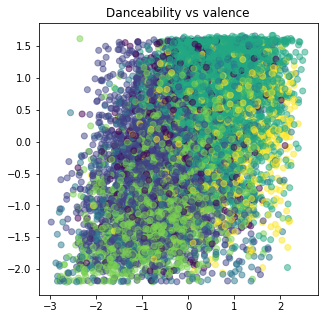

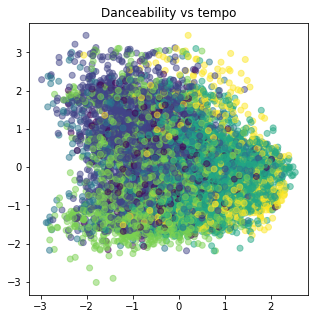

In [15]:
#Loop for plotting first(0) column with all the rest starting from energy
for i in range(1,len(audio_features.columns)):    
    plt.figure(figsize=(5, 5))
    plt.scatter(X_prep[:, 0], X_prep[:, i], c=clusters,alpha=0.5)
    plt.title(f'Danceability vs {audio_features.columns[i]}')
    plt.show()

In [16]:
data['cluster'] = clusters

In [17]:
#Filter all cluster 1

data[data['cluster'] == 1]

,song,artist,uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
3,Good Vibrations (Mono),The Beach Boys,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,0.398,0.413,-10.934,0.0388,0.082200,0.000025,0.0891,0.331,133.574,1
7,What's Going On,Marvin Gaye,spotify:track:0UAu4pJ44T9X2AmaUh1hHO,0.282,0.716,-9.632,0.0985,0.451000,0.000000,0.3990,0.830,201.958,1
12,Born to Run,Bruce Springsteen,spotify:track:4mC6yZvp9zfzp21IuLAPGD,0.253,0.868,-9.773,0.0730,0.051100,0.000000,0.2140,0.680,146.647,1
13,My Generation - Original Mono Version,The Who,spotify:track:6UdCTwbVAvNqbWyZKZiRWL,0.332,0.822,-6.558,0.0988,0.165000,0.000093,0.1610,0.745,96.253,1
15,God Only Knows - Mono / 1997 Remastered,The Beach Boys,spotify:track:6iGU74CwXuT4XVepjc9Emf,0.521,0.487,-7.525,0.0299,0.253000,0.000000,0.0579,0.483,117.072,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9923,Heartwork,Carcass,spotify:track:1PBhzfzTAZ5qyIfzqPqign,0.196,0.995,-4.887,0.1050,0.000001,0.049900,0.2700,0.177,91.047,1
9929,Operator (He Doesn't Call Me),Låpsley,spotify:track:0OW4q99xXIpbiof4ao8Oet,0.734,0.596,-7.529,0.0407,0.093100,0.000777,0.3080,0.311,120.009,1
9938,I Was Wrong,Social Distortion,spotify:track:1Lpmme6uCsPJIdcbR5aePx,0.413,0.984,-3.404,0.0472,0.000434,0.015500,0.0939,0.405,122.024,1
9942,Into The Valley,Skids,spotify:track:2QSD3K3b3BJ8DPhGhQfDPW,0.332,0.707,-12.698,0.0361,0.000012,0.006120,0.1100,0.652,144.815,1


In [18]:
#Filter all cluster 0

data[data['cluster'] == 0]

,song,artist,uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
2,A Day In The Life - Remastered,The Beatles,spotify:track:3ZFBeIyP41HhnALjxWy1pR,0.364,0.457,-14.162,0.0675,0.29000,0.000106,0.922,0.175,163.219,0
19,Paper Planes,M.I.A.,spotify:track:5QlGALr14YMN0xIDmIwleg,0.541,0.854,-6.196,0.1550,0.02540,0.000125,0.651,0.454,86.044,0
30,When Doves Cry,Prince,spotify:track:51H2y6YrNNXcy3dfc3qSbA,0.729,0.989,-4.613,0.0490,0.01020,0.000044,0.443,0.840,126.470,0
57,Mr. Tambourine Man,The Byrds,spotify:track:2HCaIYjkvWSZzaSKUoOh3d,0.456,0.470,-9.564,0.0294,0.51300,0.000038,0.444,0.639,120.336,0
62,Unfinished Sympathy - 2006 Digital Remaster,Massive Attack,spotify:track:7cFfFVVubc4K5qB0jGyguY,0.592,0.891,-5.637,0.0316,0.01450,0.141000,0.394,0.717,114.348,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9878,Dear Prudence,Siouxsie and the Banshees,spotify:track:0NrA3AznsL2lZfuZxOiIhu,0.423,0.896,-4.392,0.0467,0.01270,0.001190,0.681,0.428,101.512,0
9894,Primetime (feat. Miguel),Janelle Monáe,spotify:track:5dzV75f9qVXVvdXLTqIG4L,0.667,0.465,-8.096,0.0339,0.04260,0.006490,0.465,0.340,123.883,0
9900,A Question Of Time,Depeche Mode,spotify:track:3MZ0p7nALhbkLJfjP80fU8,0.581,0.781,-11.803,0.0293,0.00742,0.040500,0.373,0.729,136.202,0
9933,Maybe Tomorrow,Stereophonics,spotify:track:4M7XzMb9rNL4rncIXR5pD6,0.495,0.653,-6.769,0.0361,0.21700,0.000458,0.334,0.571,80.897,0


In [19]:
data.to_csv('clustered_df.csv')